In [1]:
import cv2
import os
import numpy as np
from PIL import Image
import IPython.display as display

In [2]:
def anti_aliasing():
    return (5, 5)

In [3]:
def resize():
    return cv2.INTER_LANCZOS4

In [4]:
def sharpening():
    return np.array([[0, -1, 0],
            [-1, 5, -1],
            [0, -1, 0]])

In [5]:
def first_frame(video_path):

    cap = cv2.VideoCapture(video_path)

    ret, frame = cap.read()
    cap.release() 

    if ret:
        # Convert frame from BGR (OpenCV format) to RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame)
        # Display the first frame
        display.display(img)

In [6]:
os.chdir("..")

In [7]:
#Load a video
video_path = os.path.join(os.getcwd(),"video/")
cap = cv2.VideoCapture(video_path+"sample_0000.mp4")

#Width and Height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Video Wiriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_path+"output1.mp4", fourcc, 24.0, (256, 144))

In [8]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_shapened = cv2.filter2D(frame, -1, sharpening())
    out.write(frame_shapened)

# Release the video objects
cap.release()
out.release()

In [9]:
video_path = os.path.join(os.getcwd(),"video/")
cap = cv2.VideoCapture(video_path+"sample_0000.mp4")

#Width and Height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Video Wiriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_path+"output2.mp4", fourcc, 24.0, (640, 480))

In [10]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    frame_shapened = cv2.filter2D(frame, -1, sharpening())
    frame_resized = cv2.resize(frame_shapened, (640, 480), interpolation=resize())
    out.write(frame_resized)

# Release the video objects
cap.release()
out.release()

In [11]:
#Load a video
video_path = os.path.join(os.getcwd(),"video/")
cap = cv2.VideoCapture(video_path+"sample_0000.mp4")

#Width and Height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Video Wiriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_path+"output3.mp4", fourcc, 24.0, (640, 480))

In [12]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_shapened = cv2.filter2D(frame, -1, sharpening())
    frame_resized = cv2.resize(frame_shapened, (640, 480), interpolation=resize())
    frame_anti_aliased = cv2.GaussianBlur(frame_resized, (3, 3), 0)
    out.write(frame_anti_aliased)

# Release the video objects
cap.release()
out.release()

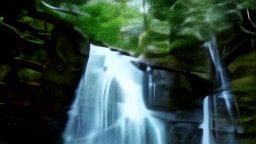

In [13]:
first_frame(video_path+"sample_0000.mp4")

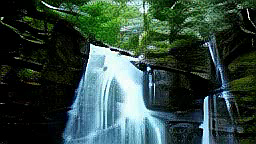

In [14]:
first_frame(video_path+"output1.mp4")

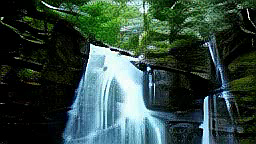

In [17]:
first_frame(video_path+"output1.mp4")

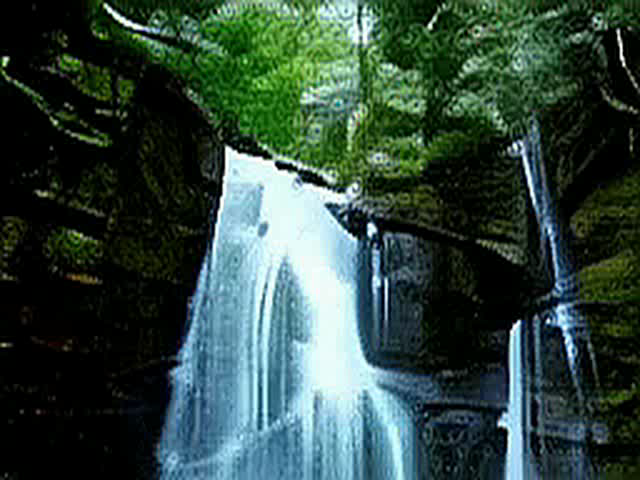

In [15]:
first_frame(video_path+"output2.mp4")

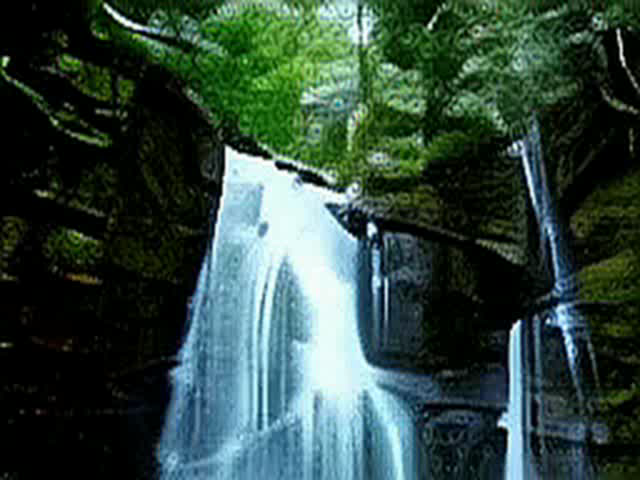

In [16]:
first_frame(video_path+"output3.mp4")

In [ ]:
cv2.destroyAllWindows()